<b>Name:</b> Vedullapalli Shanmukh Sri Sai <br>
<b>Reg.no:</b> 12007036 <br>
<b>Section:</b> K20MP 

## Questions
- What chemical characteristics are most important in predicting hte quality of wine?
- Do wines with higgher alcoholic content receive better ratings?
- Do sweeter wines (more residual sugar) receive better ratings?
- What level of acidity is associated with the highest quality?

<b>Importing required libraries</b><br>
In this project we will be requiring the following:<br>
- <b>numpy</b> for dealing with Arrays
- <b>pandas</b> for reading dataset and working with DataFrames
- <b>matplotlib</b> and <b>seaborn</b> for plotting graphs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>reading our dataset</b><br>
Our dataset is <a href="https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009">Red Wine Quality</a> which is obtained from <a href='www.kaggle.com'>Kaggle</a>.

In [48]:
data=pd.read_csv('winequality-red.csv',sep=';')

<b>viewing first five rows of the DataFrame</b>

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<b>Describing columns of the DataFrame</b><br>
The describe() method returns description of the data in the DataFrame.

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<b>Getting Info</b><br>
info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<b>Checking Null values</b><br>
- <b>isnull()</b> method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.
- <b>sum()</b> method adds all values in each column and returns the sum for each column.

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

It seems like we don't have any <b>null</b> values.<br>
Let's check out the unique elements of <b>quality</b> column.

In [7]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Now we found out the unique elements of the <b>Quality</b> column.<br>
Let's check how many rows does each one of them have.

In [8]:
values_count = data.quality.value_counts()
values_count

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Univariate Analysis

Univariate analysis explores each variable in a data set, separately.<br>

Now let's figure out what's the percentage of each unique value in the <b>Quality</b> column.

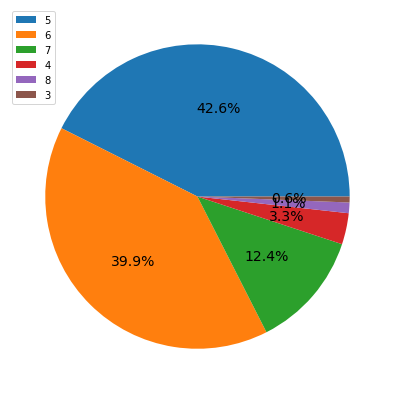

In [10]:
plt.figure(figsize=(7,7))
plt.pie(values_count,autopct='%1.1f%%',textprops={'fontsize':14})
plt.legend([5,6,7,4,8,3])
plt.show()

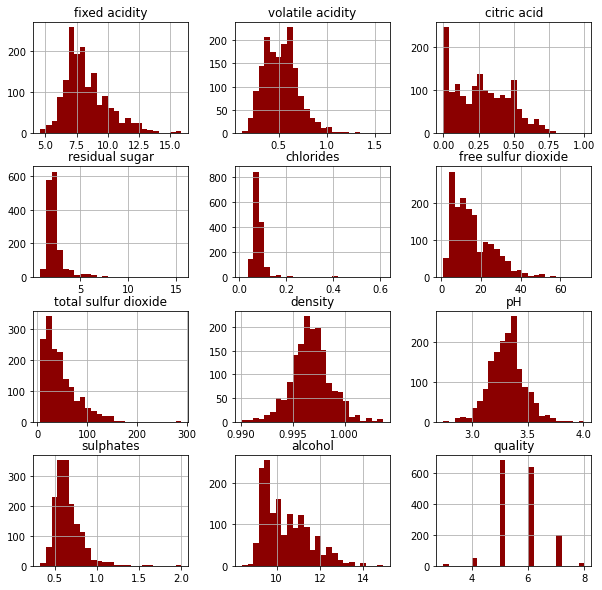

In [11]:
data.hist(bins=25,figsize=(10,10),color='darkred')
plt.show()

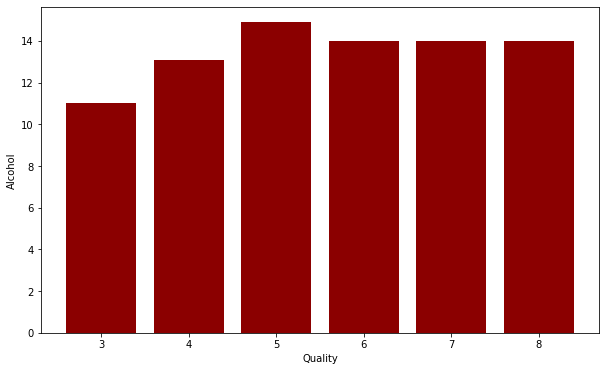

In [12]:
plt.figure(figsize=(10,6))
plt.bar(data['quality'],data['alcohol'],color='darkred')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='Count'>

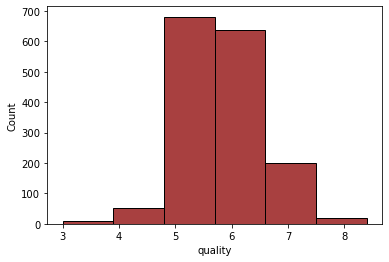

In [13]:
sns.histplot(data.quality,color='darkred',binwidth=0.9)

##### we see that wine quality is approximately normally distributed.

<AxesSubplot:xlabel='pH', ylabel='Count'>

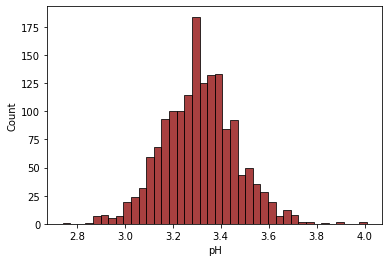

In [14]:
sns.histplot(data.pH,color='darkred')

##### The pH is normally distributed with few outliers

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

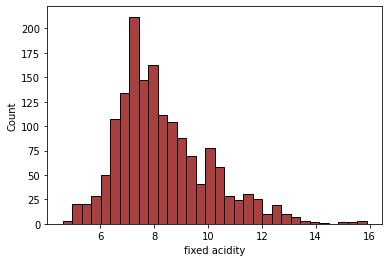

In [15]:
sns.histplot(data['fixed acidity'],color='darkred')

##### Fixed acidity have some outliers and peaks between 6 and 7 g/dm<sup>3</sup>

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

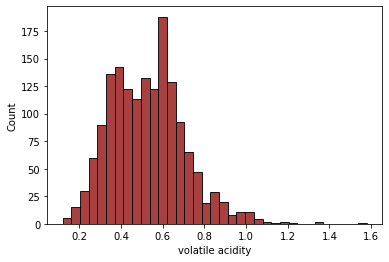

In [16]:
sns.histplot(data['volatile acidity'],color='darkred')

##### Volatile acidity has quite a few outliers with high values

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

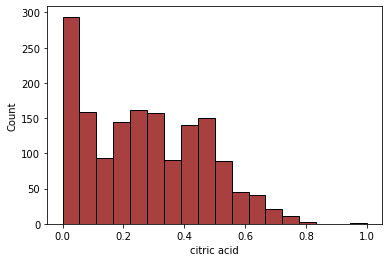

In [17]:
sns.histplot(data['citric acid'],color='darkred')

##### It looks like most of the wines have 0 g/L of citric acid. There is also a spike at 0.02.

<AxesSubplot:xlabel='density', ylabel='Count'>

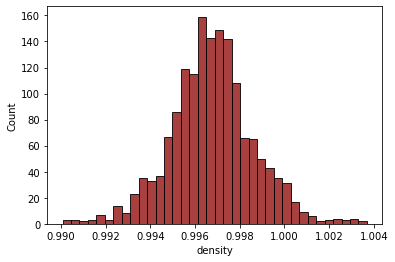

In [18]:
sns.histplot(data['density'],color='darkred')

##### Density has an almost normal distribution with few outliers.

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

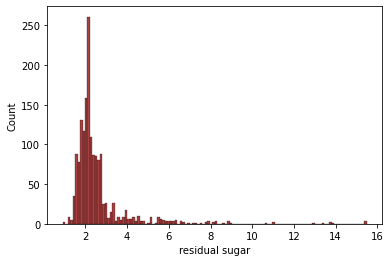

In [19]:
sns.histplot(data['residual sugar'],color='darkred')

##### There are many outliers with high residual sugar and the distribution is skewed right.

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

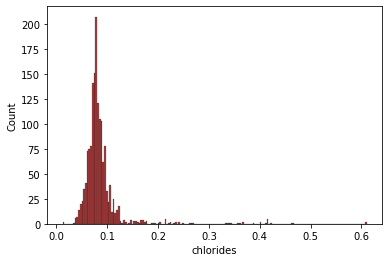

In [20]:
sns.histplot(data['chlorides'],color='darkred')

##### Chloride distribution is skewed right and with outliers

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

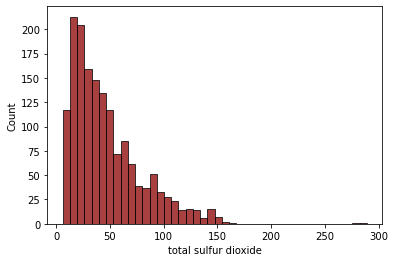

In [21]:
sns.histplot(data['total sulfur dioxide'],color='darkred')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

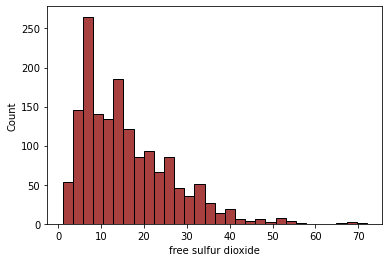

In [22]:
sns.histplot(data['free sulfur dioxide'],color='darkred')

##### Distribution for free sulfur dioxide and total sulfur dioxide is skewed right.

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

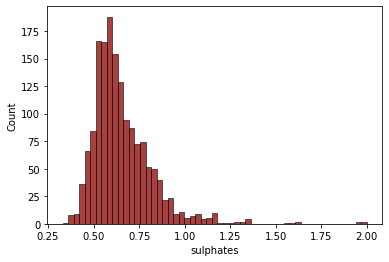

In [23]:
sns.histplot(data['sulphates'],color='darkred')

##### Distribution for sulphates is skewed right with some outliers

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

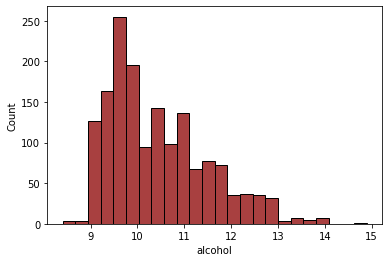

In [24]:
sns.histplot(data['alcohol'],color='darkred')

##### The alcohol distribution is right skewed. It will be interseting to see whether different quality wines have distinct alcohol content.
Let's visualize the overall patterns of each column using <b>boxplot</b>.

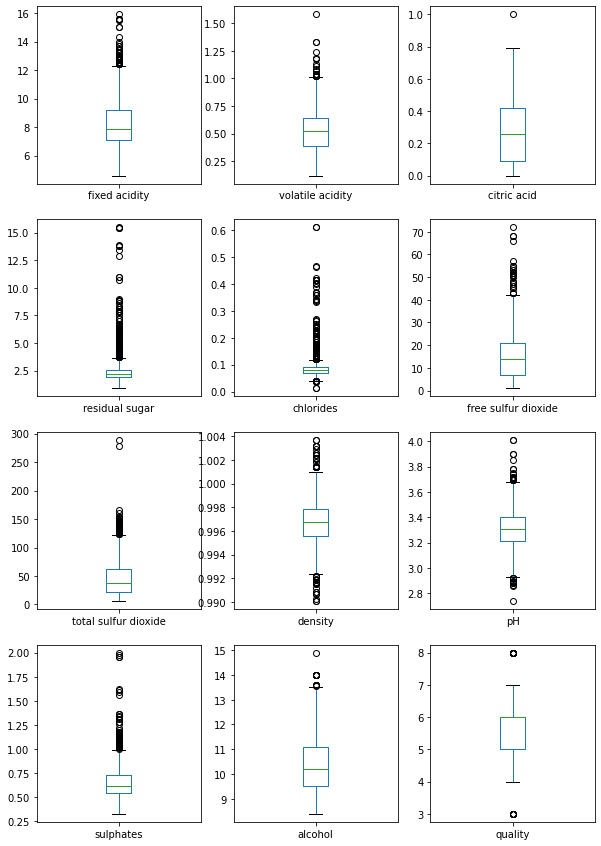

In [26]:
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(4,3,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout

Let's visualize the density of each variable along with the Interquartile Range using <b>violinplot</b>

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

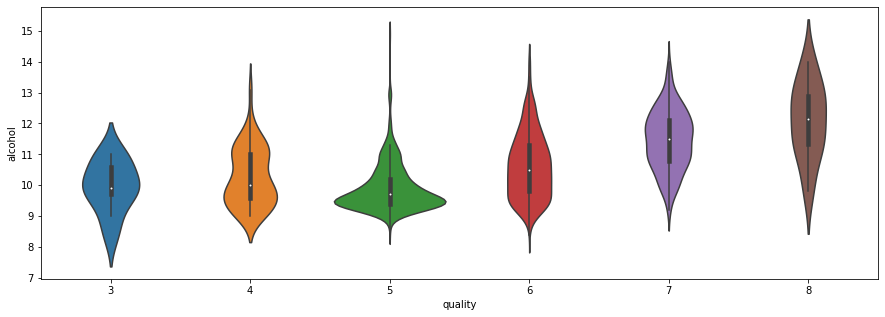

In [31]:
plt.figure(figsize=(15,5))
sns.violinplot(data=data,x='quality',y='alcohol')

## Bivariate Analysis

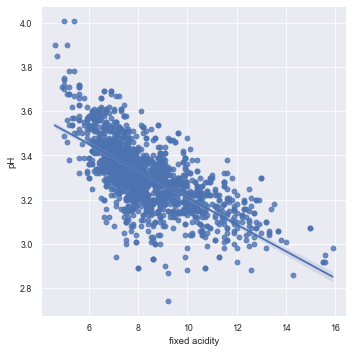

In [11]:
sns.set_theme('paper')
sns.lmplot(x='fixed acidity',y='pH',data=data)

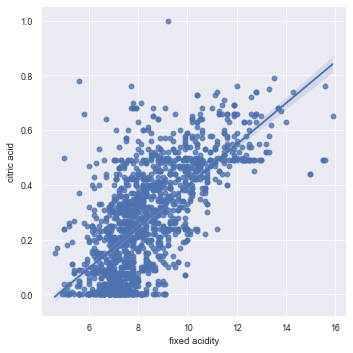

In [10]:
sns.set_theme('paper')
sns.lmplot(x='fixed acidity',y='citric acid',data=data)

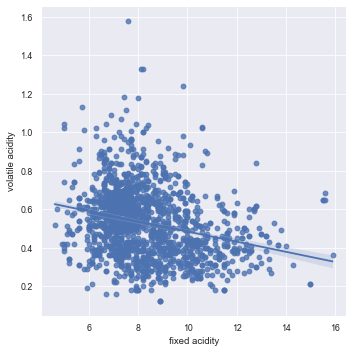

In [13]:
sns.set_theme('paper')
sns.lmplot(x='fixed acidity',y='volatile acidity',data=data)

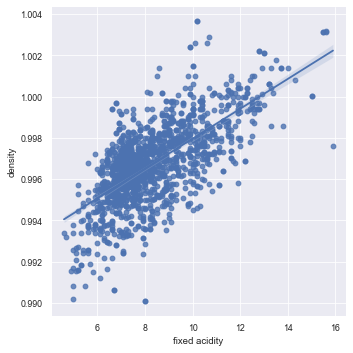

In [14]:
sns.set_theme('paper')
sns.lmplot(x='fixed acidity',y='density',data=data)

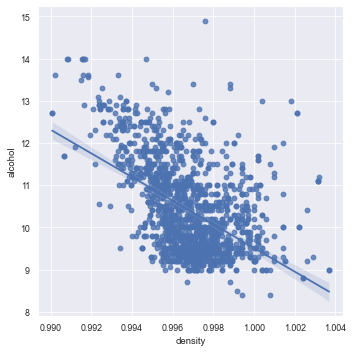

In [15]:
sns.set_theme('paper')
sns.lmplot(x='density',y='alcohol',data=data)

<AxesSubplot:>

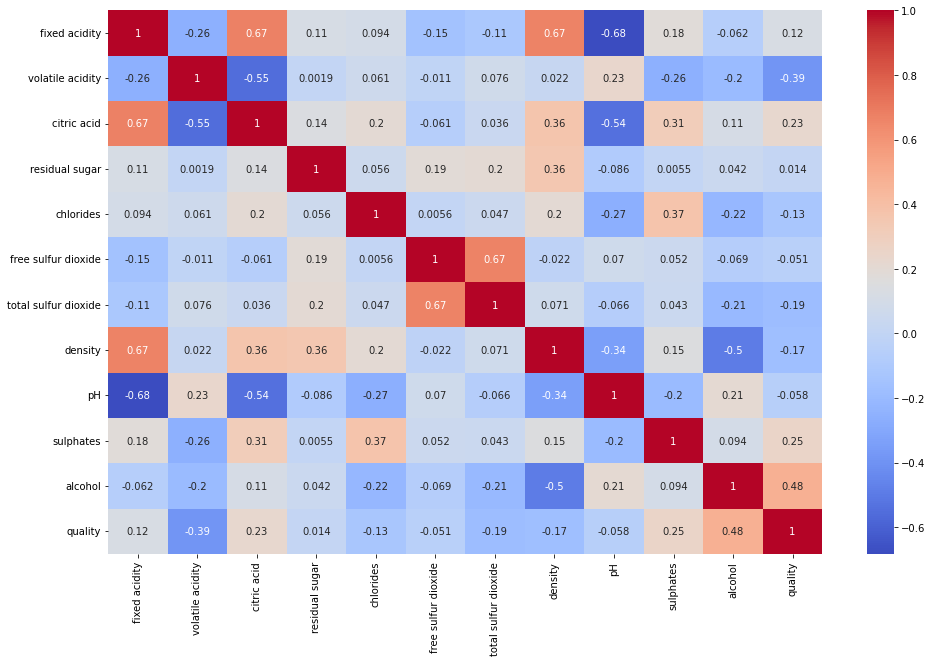

In [29]:
correlation = data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

## Multivariate Analysis

<AxesSubplot:xlabel='citric acid', ylabel='density'>

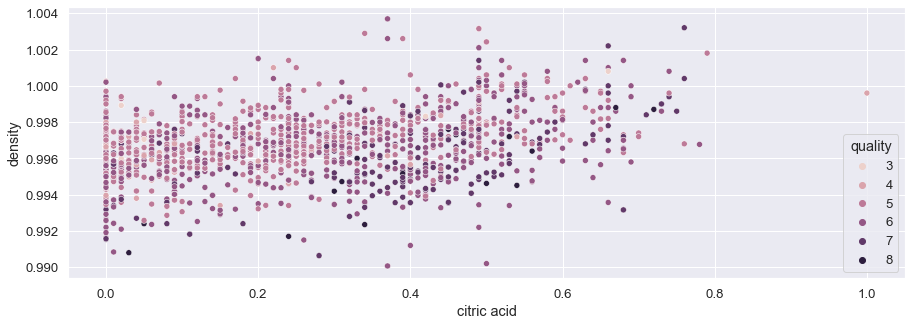

In [70]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='citric acid',y='density',hue='quality')

As you can see we can't tell much from this graph. So, let's now split quality into three groups which are bad, normal and good.

In [52]:
quality_cat=data.quality.copy()
quality_cat.replace({3:'bad',4:'bad',5:'normal',6:'normal',7:'good',8:'good'},inplace=True)
quality_cat.unique()

array(['normal', 'good', 'bad'], dtype=object)

In [53]:
data['quality_category']=quality_cat
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,normal
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,normal
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,normal
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,normal
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,normal
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,normal
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,normal
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,normal


Now we have successfully made a new column in the dataframe named <b>quality_category</b> which contains the new quality categories.<br>
Now let's plot a few scatterplots with the <b>quality_category</b> as their third variable.

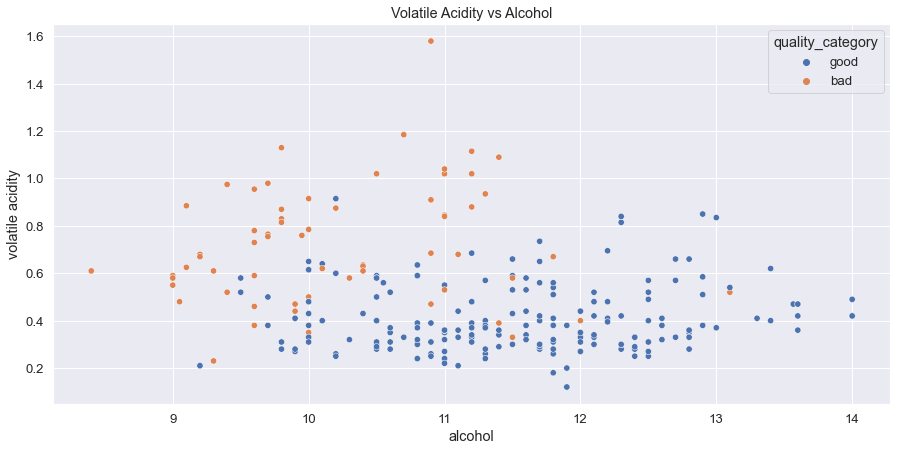

In [69]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.2)
sns.scatterplot(data=data[data['quality_category']!='normal'],x='alcohol',y='volatile acidity',hue='quality_category',s=40)
plt.title('Volatile Acidity vs Alcohol')
plt.show()

There’s apparent pattern that high quality wine will more likely to fall into bottom right side of this graph, which means higher alcohol level plus lower volitile acidity will likely to indicate a better red wine.

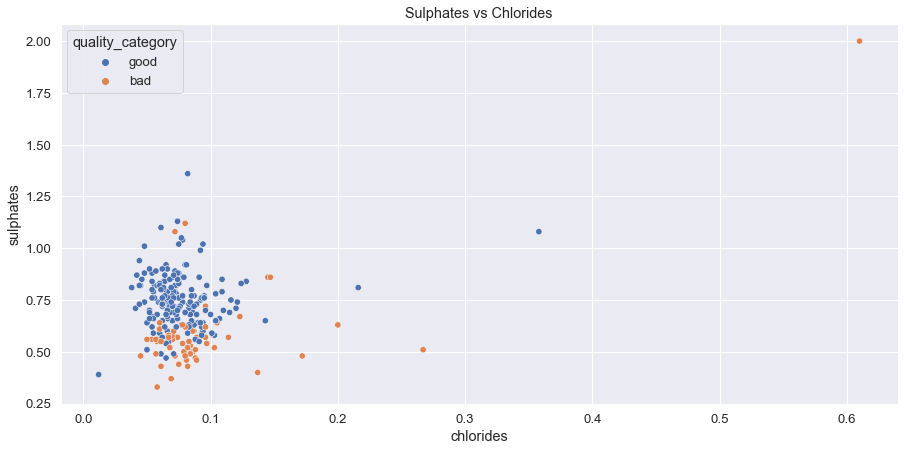

In [68]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.2)
sns.scatterplot(data=data[data['quality_category']!='normal'],x='chlorides',y='sulphates',hue='quality_category',s=40)
plt.title('Sulphates vs Chlorides')
plt.show()

We can see from the plot that high quality wines are more likely to have high sulphates. The reason could be that sulphates is preservative which can maintain a wine’s freshness because of its antioxidant and antibacterial properties.

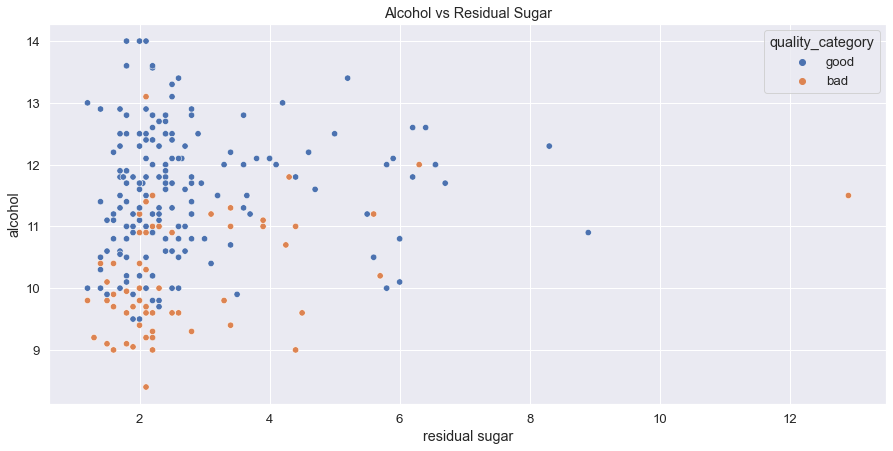

In [66]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.2)
sns.scatterplot(data=data[data['quality_category']!='normal'],x='residual sugar',y='alcohol',hue='quality_category',s=40)
plt.title('Alcohol vs Residual Sugar')
plt.show()

As residual sugar doesn’t affect quality, alcohol is main indicator of wine quality. Higher-quality wines are more likely having higher percentage alcohol.

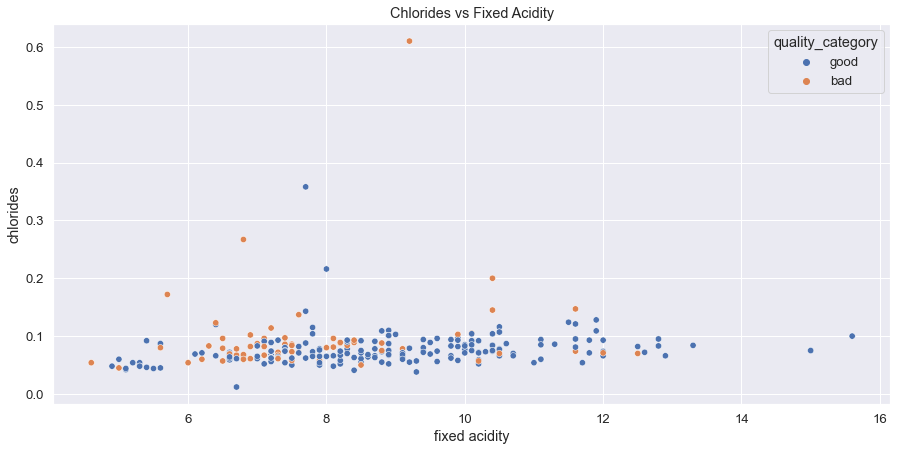

In [65]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.2)
sns.scatterplot(data=data[data['quality_category']!='normal'],x='fixed acidity',y='chlorides',hue='quality_category',s=40)
plt.title('Chlorides vs Fixed Acidity')
plt.show()

As there’re more orange points at left side, which means low quality wines tend to have less fixed acidity. However, this pattern is not very strong.

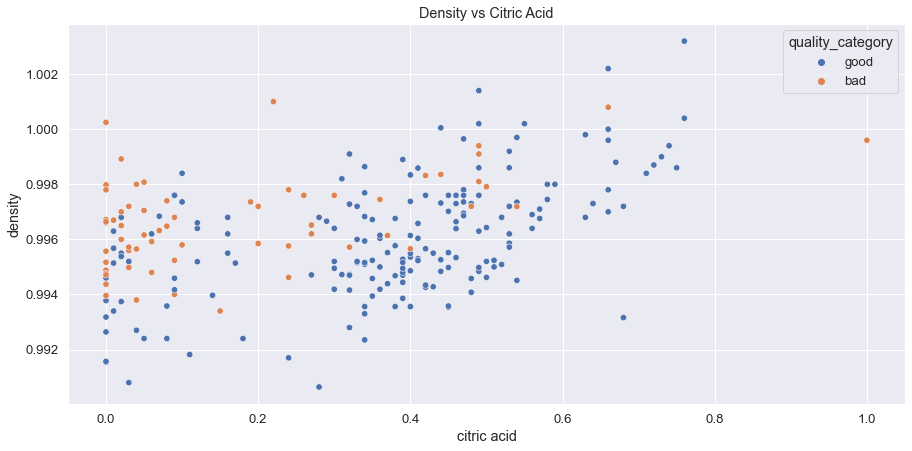

In [64]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.2)
sns.scatterplot(data=data[data['quality_category']!='normal'],x='citric acid',y='density',hue='quality_category',s=40)
plt.title('Density vs Citric Acid')
plt.show()

Citric Acid and Density are the 2 most significant indicators for quality. Here I plot them together. From the chart we can see low quality wines tend to have high density, which is reasonable because more alcohol, as discussed above, can enhance quality but meanwhile reduce density. On the other hand, as majority blue points are lying at right side, high quality wines tend to have higher citric acid.

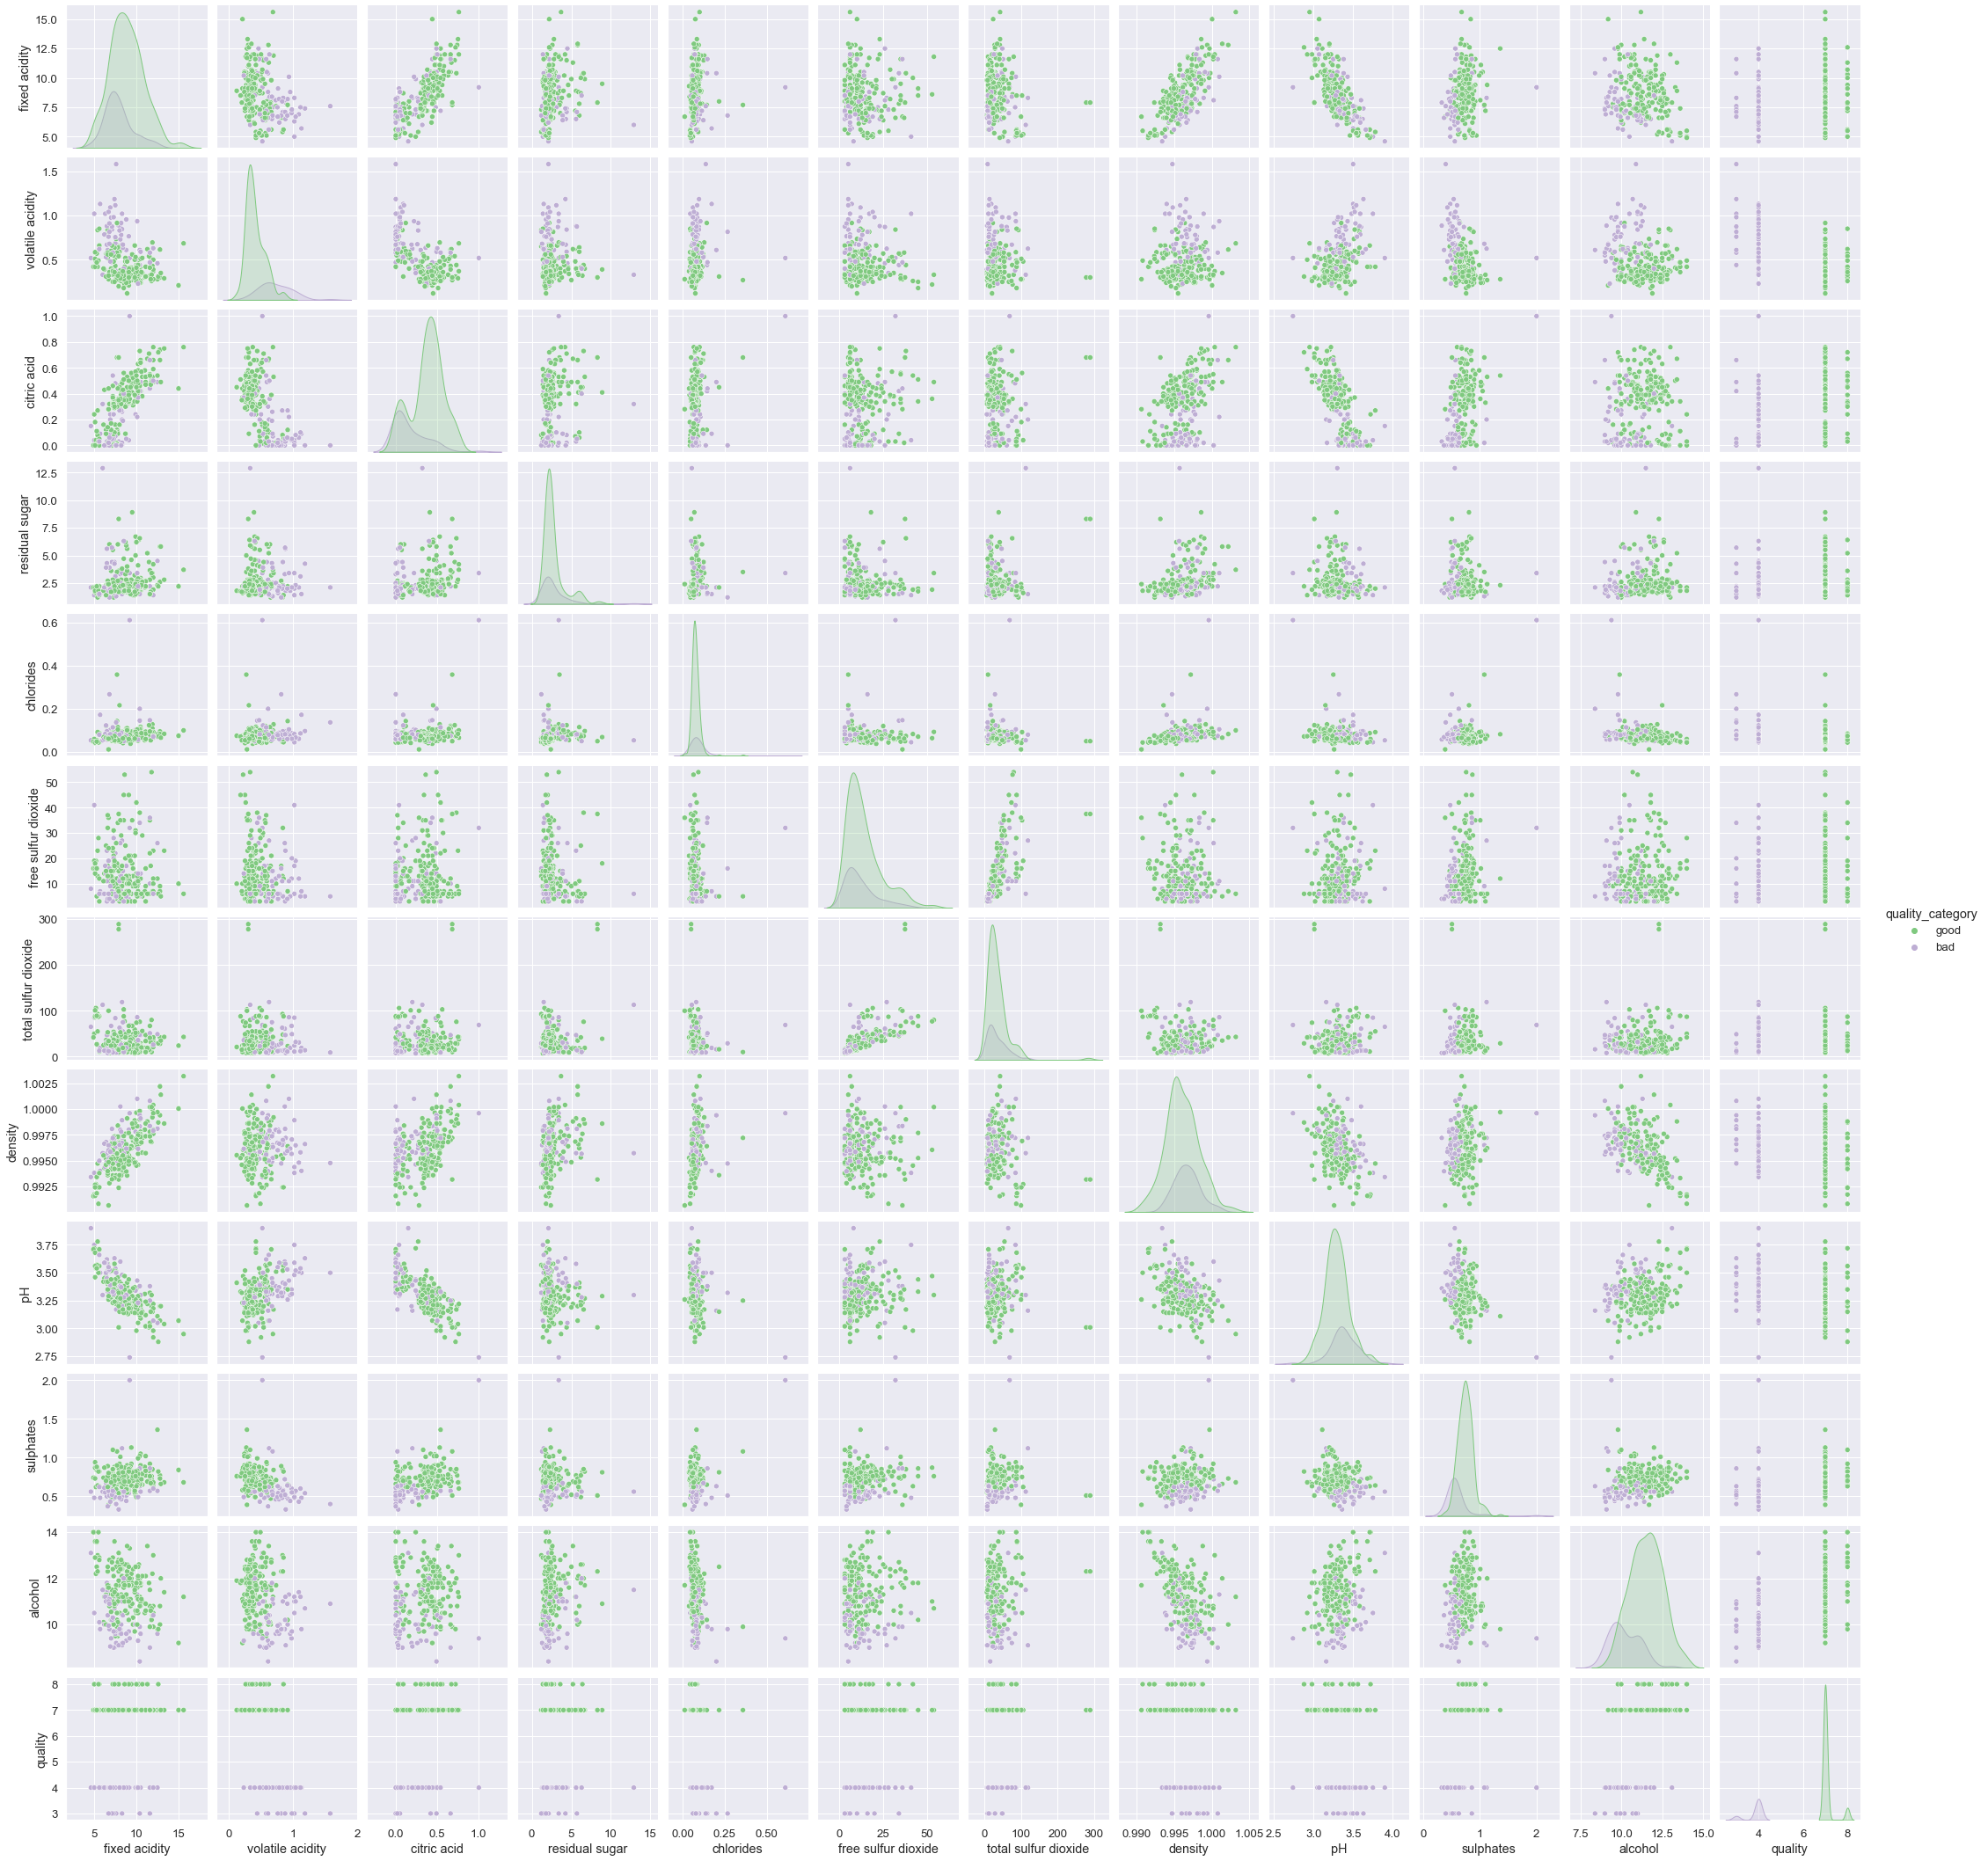

In [71]:
sns.pairplot(data[data['quality_category']!='normal'],hue='quality_category',palette='Accent')

In this pairplot we can see a lot of graphs which shows the relation among the x and y axis.